In [11]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [12]:
import db
import numpy as np
import matplotlib.pyplot as plt
import locate
import scipy as sp

In [13]:
%sql sqlite:///schema/test.db

u'Connected: None@schema/test.db'

In [17]:
%matplotlib notebook
result = %sql select * from experiment
print result

result = %sql select experiment_id, array_id, mic_id, delay from mic
print result

result = %sql select * from array
print result

result = %sql select * from mic_pair
print result

Done.
+----+------------+--------+--------+
| id |  datetime  |   x    |   y    |
+----+------------+--------+--------+
| 1  | 1487734630 |  5.0   |  5.0   |
| 2  | 1487736262 |  99.0  |  99.0  |
| 3  | 1487736310 |  88.0  |  88.0  |
| 4  | 1487736761 | 101.0  | 101.0  |
| 5  | 1487736872 | 5555.0 | 5555.0 |
| 6  | 1487736998 |  6.0   |  6.0   |
+----+------------+--------+--------+
(sqlite3.OperationalError) no such column: delay [SQL: u'select experiment_id, array_id, mic_id, delay from mic']
None
Done.
+---------------+----------+-----+-----+----------------+-----------------+
| experiment_id | array_id |  x  |  y  |       r        |      theta      |
+---------------+----------+-----+-----+----------------+-----------------+
|       1       |    0     | 0.0 | 0.0 | -434019.776975 |  45.0712502664  |
|       3       |    0     | 0.0 | 0.0 | 348.020095962  | -0.592509945886 |
|       4       |    0     | 0.0 | 0.0 | 348.020095962  |  3.59629005411  |
|       5       |    0     | 0.0 

In [18]:
cur_experiment_id = 6
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = result[0][0]
mic_2 = result[1][0]
print np.array(mic_1)

# This is equivalent to what mic_1 is doing to fetch data
#mic_3 = db.get_mic_data(cur_experiment_id, 0, 0)

mic_3 = result[2][0]

Done.
[140 140 141 ..., 140 141 139]


<IPython.core.display.Javascript object>


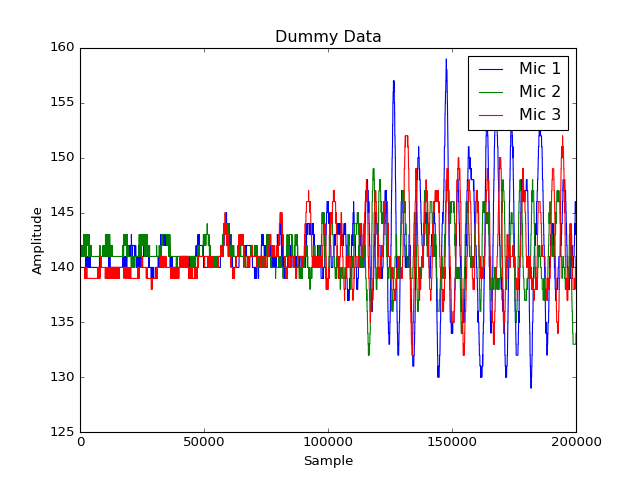

In [22]:
import matplotlib.pyplot as plt
#print locate.xcorr(np.array(mic_1), np.array(mic_2))

plt.plot(sp.signal.medfilt(np.array(mic_1), 51)[1200000:1400000], label='Mic 1', lw=1)
plt.plot(sp.signal.medfilt(np.array(mic_2), 51)[1200000:1400000], label='Mic 2', lw=1)
plt.plot(sp.signal.medfilt(np.array(mic_3), 51)[1200000:1400000], label='Mic 3', lw=1)
plt.legend()
plt.title('Dummy Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()